### Familiarization with Discrete FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy.fft as ft
import matplotlib.image as mpimg

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299,0.587,0.114])

N = 130
eps = 1

In [3]:
def fourier(img):
    
    fti = abs(ft.fft2(img))
    ftshift = ft.fftshift(fti)

    fig = plt.figure(1, figsize=(15, 15))
    ax1 = plt.subplot(231)
    ax2 = plt.subplot(232)

    ax1.imshow(img, cmap='gray', origin='lower')
    ax2.imshow(ftshift, cmap='gray', origin='lower')

    return

### Circle

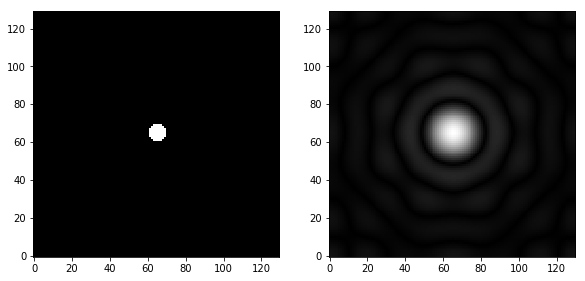

In [4]:
rad = 5
center = N//2

dot = np.zeros([N,N])
for x in range(N):
    for y in range(N):
        if np.sqrt((x - center)**2 + (y - center)**2) < rad:
            dot[x][y] = 1

n1 = fourier(dot)

### Letter A

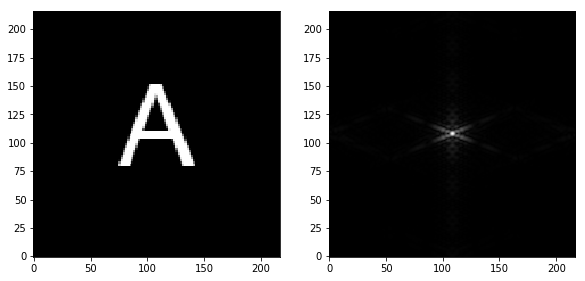

In [5]:
A = rgb2gray(plt.imread('A.png'))
n2 = fourier(A)

### Gaussian bell curve

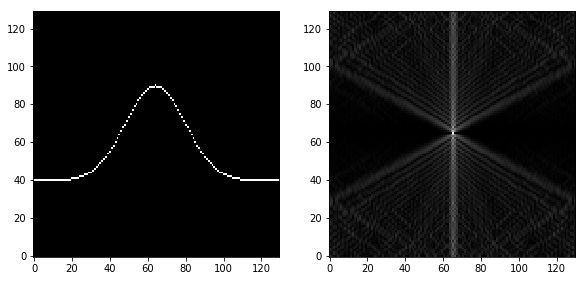

In [6]:
gus = np.zeros([N,N])
for x in range(N):
    c = np.sqrt(250)
    b, amp = 64, 50
    y = int((amp*np.exp(-((x-b)**2)/(2*c**2))) + 40)
    gus[y][x] = 1
n3 = fourier(gus)

### Double slit

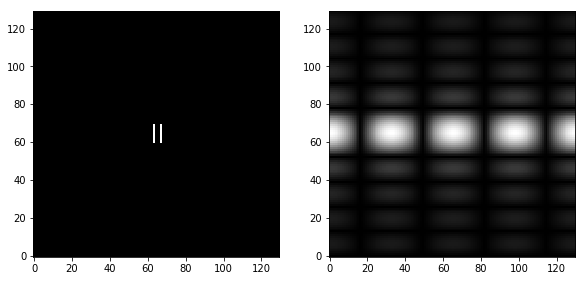

In [7]:
size = 10
slit = range(center - size//2, center + size//2)
c1, c2 = center + 2, center - 2

ds = np.zeros([N,N])
for y in slit:
    ds[y][c1] = 1
    ds[y][c2] = 1
n4 = fourier(ds)

### Sinusoidal wave

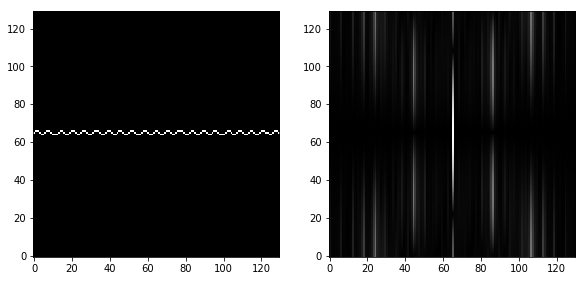

In [8]:
center = N//2
sin = np.zeros([N,N])
for x in range(N):
    y = int(2*np.sin(x)) + center
    sin[y][x] = 11
n5 = fourier(sin)